## 聚类

In [1]:
import pandas as pd

In [2]:
# beer dataset
file = '/Users/joey/Documents/PycharmProjects/mywork/clustering_algorithm/data.txt'
beer = pd.read_csv(file, sep=' ') # usecols
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [3]:
X = beer[['calories', 'sodium', 'alcohol', 'cost']]
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


## K-means clustering

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)


In [5]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,0,1
3,Kronenbourg,170,7,5.2,0.73,0,1
4,Heineken,152,11,5.0,0.77,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1
16,Hamms,139,19,4.4,0.43,0,1


In [6]:
from pandas.plotting import scatter_matrix  # 散点图矩阵图

cluster_centers = km.cluster_centers_
cluster_centers_2 = km2.cluster_centers_

In [29]:
cluster_centers, cluster_centers_2

(array([[150.        ,  17.        ,   4.52142857,   0.52071429],
        [102.75      ,  10.        ,   4.075     ,   0.44      ],
        [ 70.        ,  10.5       ,   2.6       ,   0.42      ]]),
 array([[ 91.83333333,  10.16666667,   3.58333333,   0.43333333],
        [150.        ,  17.        ,   4.52142857,   0.52071429]]))

In [7]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,1
1,102.75,10.0,4.075000,0.440000,0
2,70.00,10.5,2.600000,0.420000,0


In [8]:
beer.groupby('cluster2').mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.333333
1,150.000000,17.000000,4.521429,0.520714,0.000000


In [9]:
centers = beer.groupby('cluster').mean().reset_index()
centers

,cluster,calories,sodium,alcohol,cost,cluster2
0,0,150.00,17.0,4.521429,0.520714,1
1,1,102.75,10.0,4.075000,0.440000,0
2,2,70.00,10.5,2.600000,0.420000,0


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
plt.style.use('seaborn-white') # 设置画布背景颜色
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0, 0.5, 'Alcohol')

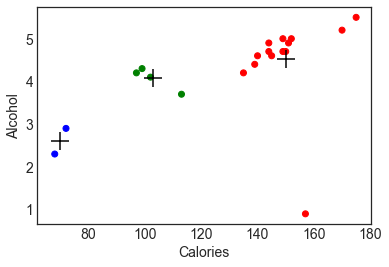

In [11]:
plt.scatter(beer['calories'], beer['alcohol'], c=colors[beer['cluster']])
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('Calories')
plt.ylabel('Alcohol')

Text(0.5, 0.98, 'with 3 centroies initialized')

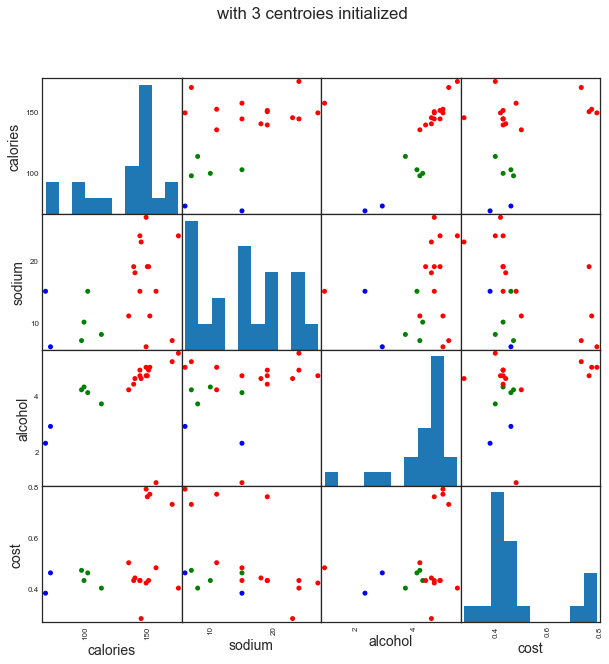

In [12]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]], s=100, alpha=1, c=colors[beer['cluster']], figsize=(10,10))
plt.suptitle('with 3 centroies initialized')

### Scaled data

In [13]:
# 数据标准化，归一标准
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [14]:
km = KMeans(n_clusters=3).fit(X_scaled)

In [15]:
beer['scaled_cluster'] = km.labels_
beer.sort_values('scaled_cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
3,Kronenbourg,170,7,5.2,0.73,0,1,0
4,Heineken,152,11,5.0,0.77,0,1,0
14,Kirin,149,6,5.0,0.79,0,1,0
13,Becks,150,19,4.7,0.76,0,1,0
0,Budweiser,144,15,4.7,0.43,0,1,1
1,Schlitz,151,19,4.9,0.43,0,1,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1,1
6,Augsberger,175,24,5.5,0.40,0,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1,1


集群的特征

In [16]:
beer.groupby('scaled_cluster').mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,155.250,10.750,4.9750,0.7625,0.0,1.00
1,148.375,21.125,4.7875,0.4075,0.0,1.00
2,105.375,10.875,3.3250,0.4475,1.0,0.25


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa4d79a610>,
      dtype=object)

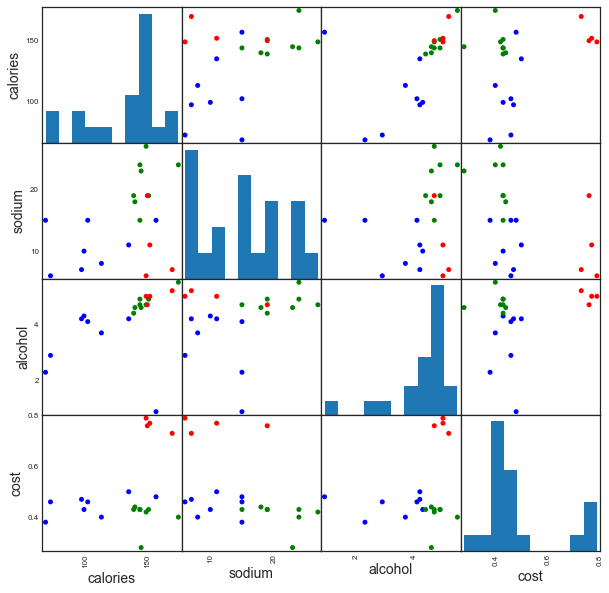

In [17]:
scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100) # alpha: Amount of transparency applied.


### 聚类评估：轮廓系数（Silhouette Coefficient）
<img src="/Users/joey/Documents/PycharmProjects/mywork/clustering_algorithm/1.png" alt="FAO" width="490">

- 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
- 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}


* si接近1，则说明样本i聚类合理
* si接近-1，则说明样本i更应该分类到另外的簇
* 若si 近似为0，则说明样本i在两个簇的边界上。

In [18]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X, beer.scaled_cluster)
score = metrics.silhouette_score(X, beer.cluster)
print(score_scaled, score)

0.1797806808940007 0.6731775046455796


In [19]:
scores = []
for k in range(2, 20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)
scores

[0.6917656034079486,
 0.6731775046455796,
 0.5857040721127795,
 0.422548733517202,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.3915697409245163,
 0.32472080133848924,
 0.3459775237127248,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.2849514001174898,
 0.23498077333071996,
 0.1588091017496281,
 0.08423051380151177]

Text(0, 0.5, 'Sihouette Score')

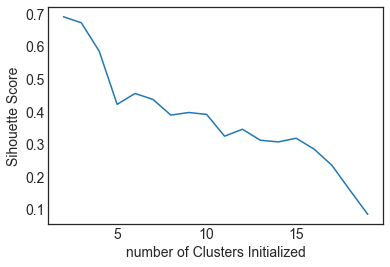

In [20]:
plt.plot(list(range(2,20)), scores)
plt.xlabel('number of Clusters Initialized')
plt.ylabel('Sihouette Score')

### DBSCAN clustering

In [21]:
from sklearn.cluster import DBSCAN
db_labels = DBSCAN(eps=10, min_samples=2).fit(X).labels_
db_labels

array([ 0,  0,  0, -1,  0,  0, -1,  0,  1, -1,  0,  1,  0,  0,  0,  2,  0,
        0,  2,  1])

In [22]:
beer['cluster_db'] = db_labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,1,0,2,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,0,-1
6,Augsberger,175,24,5.5,0.40,0,1,1,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,1,0
16,Hamms,139,19,4.4,0.43,0,1,1,0
14,Kirin,149,6,5.0,0.79,0,1,0,0
13,Becks,150,19,4.7,0.76,0,1,0,0
12,Michelob_Light,135,11,4.2,0.50,0,1,2,0
10,Coors,140,18,4.6,0.44,0,1,1,0
0,Budweiser,144,15,4.7,0.43,0,1,1,0


In [23]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.333333,0.666667,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,1.000000,0.916667
1,99.333333,10.666667,4.200000,0.453333,1.000000,0.000000,2.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,0.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa4efb2750>,
      dtype=object)

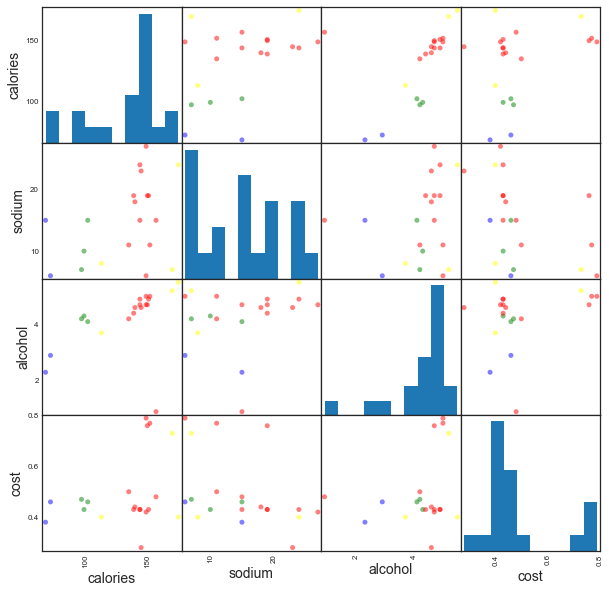

In [24]:
scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)

In [25]:
scores = []
for k in range(2, 20):
    labels = DBSCAN(eps=k, min_samples=2).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)
scores


[-0.03670705609846274,
 -0.03670705609846274,
 -0.06781609566358748,
 -0.06781609566358748,
 0.1626084889128696,
 0.12626205982196476,
 0.16564759416041527,
 0.42951251219183106,
 0.49530955296776086,
 0.49530955296776086,
 0.49530955296776086,
 0.49530955296776086,
 0.5857040721127795,
 0.5857040721127795,
 0.5238781710613801,
 0.5238781710613801,
 0.6731775046455796,
 0.6731775046455796]

Text(0, 0.5, 'Sihouette Score')

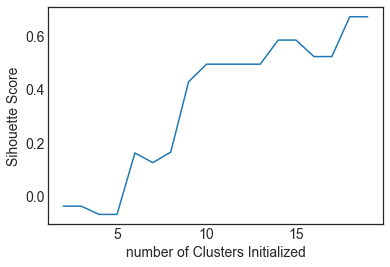

In [26]:
plt.plot(list(range(2,20)), scores)
plt.xlabel('number of Clusters Initialized')
plt.ylabel('Sihouette Score')